# Cleaning the Naukri dataset (my fav one)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data = pd.read_csv('naukri.csv')
print(data.shape)
data.head()

(22000, 14)


,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


## split the locations to explode the dataset and understand things better

In [3]:
data['joblocation_address'] = data['joblocation_address'].str.split(', ')
data['joblocation_address'][:10]

0                                            [Chennai]
1                                            [Chennai]
2                                          [Bengaluru]
3    [Mumbai, Bengaluru, Kolkata, Chennai, Coimbato...
4                                          [Bengaluru]
5                                          [Bengaluru]
6    [Delhi NCR, Mumbai, Bengaluru, Kochi, Greater ...
7                                          [Bengaluru]
8                                          [Bengaluru]
9                                          [Bengaluru]
Name: joblocation_address, dtype: object

In [4]:
data = data.explode('joblocation_address')
data['joblocation_address'] = data['joblocation_address'].str.strip()
pd.set_option('max_rows', 3000)
data['joblocation_address'].value_counts()[:100]

Bengaluru/Bangalore                   6605
Mumbai                                5961
Chennai                               3369
Hyderabad / Secunderabad              2648
Delhi                                 2465
Bengaluru                             2441
Gurgaon                               1909
Hyderabad                             1712
Noida                                 1681
Delhi/NCR(National Capital Region)    1438
Pune                                  1227
Bengaluru / Bangalore                  718
Kolkata                                543
Ahmedabad                              404
Noida/Greater Noida                    381
Hyderabad/Secunderabad                 210
Navi Mumbai                            203
Delhi/NCR                              200
Chandigarh                             189
Ghaziabad                              188
Delhi NCR                              176
Faridabad                              159
Mumbai Suburbs                         150
Coimbatore 

## Removing all the possible duplicates for a cleaner dataset

In [5]:
data['joblocation_address'] = data['joblocation_address'].replace(('Vadodara/Baroda', 'Vadodara', 'Baroda'), 'Vadodara')
data['joblocation_address'] = data['joblocation_address'].replace(('Bengaluru/Bangalore', 'Bengaluru / Bangalore', 'bangalore', 'Bengaluru Bangalore', 'India-Karnataka-Bangalore', 'Bangalore', 'India - Bangalore', 'Near Bangalore', 'IN - KA - Bangalore', 'India-Bangalore'), 'Bangalore')
data['joblocation_address'] = data['joblocation_address'].replace(('Other City(s) in Gujarat ,', 'Other City(s) in Gujarat', 'Gujarat'), 'Gujarat')
data['joblocation_address'] = data['joblocation_address'].replace(('THANE', 'Thane', 'thane', 'IND-Maharashtra-Thane'), 'Thane')
data['joblocation_address'] = data['joblocation_address'].replace(('Hyderabad / Secunderabad', 'Hyderabad/Secunderabad', 'primary_city":"Hyderabad"'), 'Hyderabad')
data['joblocation_address'] = data['joblocation_address'].replace(('Visakhapatnam/Vizag', 'Visakhapatnam'), 'Visakhapatnam')
data['joblocation_address'] = data['joblocation_address'].replace(('Ernakulam / Kochi/ Cochin', 'Cochin/ Kochi/ Ernakulam', 'Kochi'), 'Kochi')
data['joblocation_address'] = data['joblocation_address'].replace(('Delhi/NCR(National Capital Region)', 'Delhi/NCR', 'Delhi NCR', 'Noida', 'India-Gurgaon-Gurgaon', 'Location: Gurgaon', 'Noida/Greater Noida', 'Noida/ Greater Noida', 'noida', 'Ghaziabad', 'Faridabad', 'Greater Noida', 'delhi', 'India; Gurgaon', 'gurgaon', 'Gurgaon', 'IN-HR-Gurgaon', 'IN - DL - New Delhi', 'IN-DL-New Delhi', 'New Delhi', 'INDIA - Noida', 'India-Noida', 'INDIA-NOIDA-NOIDA', 'NCR'), 'NCR')
data['joblocation_address'] = data['joblocation_address'].replace(('Navi Mumbai', 'Mumbai Suburbs', 'mumbai', 'maharashtra', 'Mumbai', 'NAVI MUMBAI', 'IN-MH-Greater Mumbai-Mumbai-Voltas C', 'IN-MH-Greater Mumbai-Mumbai', 'Other City(s) in Maharashtra', 'Asia-India-Greater Mumbai', 'JOB LOCATION: MUMBAI (INDIA)', 'Mumbai Corporate Office', 'Goregaon (E)', 'IN-MH-Mumbai-Prism Towers / 31002', 'Borivali', 'National Team Mumbai', 'National Team - Mumbai', 'India - Mumbai', 'GOREGOAN', 'ANDHERI', 'India-Mumbai'), 'Mumbai')
data['joblocation_address'] = data['joblocation_address'].replace(('chennai', 'Chennai'), 'Chennai')
data['joblocation_address'] = data['joblocation_address'].replace(('jaipur', 'Jaipur'), 'Jaipur')
data['joblocation_address'] = data['joblocation_address'].replace(('Haryana Other', 'haryana', 'Haryana'), 'Haryana')
data['joblocation_address'] = data['joblocation_address'].replace(('Andhrapradesh Other', 'Other City(s) in Andhra Pradesh', '"primary_state":"Andhra Pradesh', 'andra', 'Other City(s) in Andhra Pradesh ,'), 'Andhra Pradesh')
data['joblocation_address'] = data['joblocation_address'].replace(('Other City(s) in Uttar Pradesh', 'Uttarpradesh Other'), 'Uttar Pradesh')
data['joblocation_address'] = data['joblocation_address'].replace(('Durg ,', 'Varanasi / Banaras ,', 'Doda ,'),('Durg', 'Varnasi', 'Doda'))
data['joblocation_address'] = data['joblocation_address'].replace(('Karnataka Other', 'karnataka'), 'Karnataka')
data['joblocation_address'] = data['joblocation_address'].replace(('Thrissur / Trichur', 'Thrissur'), 'Thrissur')
data['joblocation_address'] = data['joblocation_address'].replace(('Ahmedabad', 'ahmedabad'), 'Ahmedabad')
data['joblocation_address'] = data['joblocation_address'].replace(('Thiruvananthapuram ,', 'Other City(s) in Kerala ,', 'Other City(s) in Tamil Nadu ,', '- Chandigarh', 'Bikaner ,'),('Thiruvananthapuram', 'Other City(s) in Kerala', 'Other City(s) in Tamil Nadu', 'Chandigarh', 'Bikaner'))
data['joblocation_address'].value_counts()[10:]

Chandigarh                                       190
Kochi                                            140
Coimbatore                                       136
Jaipur                                           131
Visakhapatnam                                    125
Surat                                            106
Lucknow                                          101
Vijayawada                                        84
Bhubaneshwar                                      80
Karnataka                                         71
Trivandrum                                        69
Vadodara                                          68
Indore                                            66
Thane                                             58
Mangalore                                         58
Nagpur                                            52
Mysore                                            43
Bhopal                                            42
Guwahati                                      

## Let's focus on cities with more jobs

In [6]:
counts = data['joblocation_address'].value_counts()
data = data.loc[data['joblocation_address'].isin(counts.index[counts > 25])]
display(data['joblocation_address'].value_counts())

Bangalore        7472
Mumbai           6437
NCR              6238
Hyderabad        4571
Chennai          3373
Delhi            2465
Bengaluru        2441
Pune             1227
Kolkata           543
Ahmedabad         405
Chandigarh        190
Kochi             140
Coimbatore        136
Jaipur            131
Visakhapatnam     125
Surat             106
Lucknow           101
Vijayawada         84
Bhubaneshwar       80
Karnataka          71
Trivandrum         69
Vadodara           68
Indore             66
Thane              58
Mangalore          58
Nagpur             52
Mysore             43
Bhopal             42
Guwahati           41
Kanpur             40
Haryana            39
Patna              38
Trichy             33
Raipur             32
Dehradun           32
Ludhiana           30
Agra               28
Ranchi             27
Nasik              27
Hubli              26
Name: joblocation_address, dtype: int64

## Plot of cities with > 25 jobs

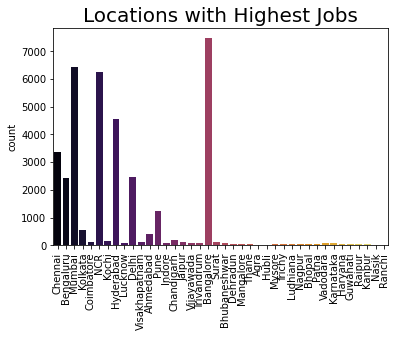

In [7]:
sns.countplot(x = data['joblocation_address'], palette = 'inferno')
plt.title('Locations with Highest Jobs', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)
plt.show()

## Cleaning Experience column

In [8]:
print(data['experience'])
data['experience'] = data['experience'].str.split(' ')

0          0 - 1 yrs
1          0 - 0 yrs
2          4 - 8 yrs
3        11 - 15 yrs
3        11 - 15 yrs
            ...     
21996      3 - 5 yrs
21997      2 - 4 yrs
21998     7 - 12 yrs
21998     7 - 12 yrs
21999     5 - 10 yrs
Name: experience, Length: 37185, dtype: object


In [9]:
# Split experience into 2 columns: minimum and maximum
data['Min Experience'] = data['experience'].apply(lambda x: x[0])
data['Max Experience'] = data['experience'].apply(lambda x: x[2] if len(x) > 2 else x[1])
data['Min Experience'].value_counts()

2      7384
0      6470
3      5397
1      4556
5      3366
4      3169
6      1539
10     1442
8      1300
7      1066
9       486
12      318
15      291
Not     111
13       75
11       75
14       63
20       27
18       25
16       16
17        6
26        1
25        1
23        1
Name: Min Experience, dtype: int64

In [10]:
data['Max Experience'].value_counts()

5            6542
7            4550
8            3777
6            3351
3            3269
10           2904
4            2686
9            1828
2            1618
1            1106
12           1098
11           1063
15            842
13            688
20            503
0             378
14            251
18            136
Mentioned     111
16            109
17             95
25             85
22             85
19             28
23             27
24             21
21             12
30             11
28              8
26              1
27              1
-1              1
Name: Max Experience, dtype: int64

In [11]:
data['Min Experience'] = data['Min Experience'].replace('Not', 0)
data['Min Experience'] = data['Min Experience'].astype('int')
data['Max Experience'] = data['Max Experience'].replace(('Mentioned', '-1'), 5)
data['Max Experience'] = data['Max Experience'].astype('int')

C:\Users\claim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\claim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


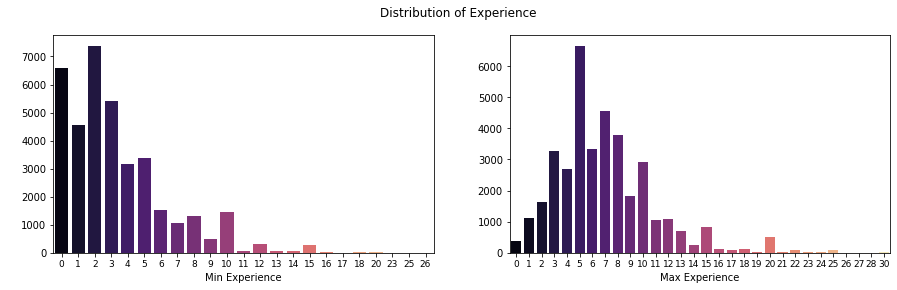

In [12]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.subplot(1, 2, 1)
sns.countplot(data['Min Experience'], palette='magma')
plt.xticks(fontsize = 9)
plt.ylabel(' ')

plt.subplot(1, 2, 2)
sns.countplot(data['Max Experience'], palette='magma')
plt.xticks(fontsize = 9)
plt.ylabel(' ')

plt.suptitle('Distribution of Experience')
plt.show()

## Cleaning Education column

In [13]:
data['education'][:15]

0    UG: B.Tech/B.E. - Any Specialization PG:Any Po...
1    UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...
2    UG: Any Graduate - Any Specialization PG:Any P...
3    UG: Any Graduate - Any Specialization PG:CA Do...
3    UG: Any Graduate - Any Specialization PG:CA Do...
3    UG: Any Graduate - Any Specialization PG:CA Do...
3    UG: Any Graduate - Any Specialization PG:CA Do...
3    UG: Any Graduate - Any Specialization PG:CA Do...
4    UG: B.Tech/B.E. - Any Specialization PG:Any Po...
5    UG: B.Tech/B.E. - Any Specialization PG:MCA - ...
6                                                  NaN
6                                                  NaN
6                                                  NaN
6                                                  NaN
6                                                  NaN
Name: education, dtype: object

In [14]:
data['education'] = data['education'].fillna('UG: Any Graduate - Any Specialization')
data['education'].isnull().sum()

0

In [15]:
data['education'] = data['education'].str.split(' ')
data['education'] = data['education'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['education'].value_counts(dropna = False)

Any                    24501
B.Tech/B.E.             8942
B.Com                    660
B.Sc                     566
Diploma                  448
Graduation               399
B.B.A                    270
B.A                      245
BCA                      178
MBBS                     160
BDS                      111
B.Pharma                  99
Other                     86
B.Ed                      85
LLB                       71
Not                       56
BHM                       55
-                         54
Doctorate                 49
B.Arch                    37
B.Tech/B.E.,              24
B.Sc,                     22
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
B.Com,                     5
Diploma,                   5
BCA,                       3
B.A,                       3
BVSC                       3
MBA/PGDM                   2
B.B.A,                     2
BFA                        1
B.Des.        

In [16]:
data['education'] = data['education'].replace(('B.Tech/B.E.', 'B.Tech/B.E.,'),'B.Tech')
data['education'] = data['education'].replace(('-', 'Not', 'Other', 'PG:Other', 'Post'), 'Other')
data['education'] = data['education'].replace(('B.Sc,', 'B.Pharma,', 'B.Com,', 'Diploma,', 'B.A,', 'BCA,', 'B.B.A,', 'Doctorate:Doctorate', 'PG:CA'),('B.Sc', 'B.Pharma', 'B.Com', 'Diploma', 'B.A', 'BCA', 'B.B.A', 'Doctorate', 'CA'))
data['education'].value_counts()

Any             24501
B.Tech           8966
B.Com             665
B.Sc              588
Diploma           453
Graduation        399
B.B.A             272
B.A               248
Other             197
BCA               181
MBBS              160
BDS               111
B.Pharma          106
B.Ed               85
LLB                71
Doctorate          58
BHM                55
B.Arch             37
Postgraduate       14
CA                 10
BVSC                3
MBA/PGDM            2
BFA                 1
B.Des.              1
BAMS                1
Name: education, dtype: int64

Looks very clean now.

## Cleaning Industry column

In [17]:
data['industry'][ : 10]

0            Media / Entertainment / Internet
1    Advertising / PR / MR / Event Management
2             IT-Software / Software Services
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
4             IT-Software / Software Services
5             IT-Software / Software Services
Name: industry, dtype: object

In [18]:
print(data['industry'].isnull().sum()) # very few!

2


In [19]:
data['industry'].fillna(data['industry'].mode()[0], inplace=True)
print(data['industry'].isnull().sum())

0


In [20]:
data['industry'] = data['industry'].str.split(' / ')
print(data['industry'].head())
data['industry'] = data['industry'].apply(lambda x: x[0])
data['industry'].value_counts()

0           [Media, Entertainment, Internet]
1    [Advertising, PR, MR, Event Management]
2           [IT-Software, Software Services]
3     [Banking, Financial Services, Broking]
3     [Banking, Financial Services, Broking]
Name: industry, dtype: object


IT-Software                 14801
BPO                          2361
Banking                      2165
Education                    1753
Recruitment                  1556
Automobile                   1188
Pharma                       1036
Internet                     1035
Construction                  970
Medical                       896
Travel                        752
Industrial Products           614
Other                         553
Accounting                    553
Strategy                      524
Advertising                   472
IT-Hardware & Networking      447
FMCG                          434
Media                         427
Insurance                     414
Retail                        376
Oil and Gas                   354
Telecom/ISP /                 320
Real Estate                   311
Consumer Electronics          274
Semiconductors                262
Electricals                   250
Textiles                      197
Courier                       184
KPO           

In [21]:
data['skills'] = data['skills'].replace('Telecom/ISP /', 'Telecom/ISP')
data['skills'].value_counts()

IT Software - Application Programming      9225
Sales                                      6072
ITES                                       3003
Production                                 1606
Accounts                                   1556
HR                                         1474
Teaching                                   1370
Marketing                                  1340
Medical                                     841
Financial Services                          774
Site Engineering                            682
IT Software - Other                         636
Engineering Design                          626
IT Software - ERP                           566
IT Software - eCommerce                     536
IT Software - Network Administration        512
IT Software - QA & Testing                  483
IT Hardware                                 475
Journalism                                  433
IT Software - DBA                           427
Supply Chain                            

The column looks much cleaner now

## Cleaning the Skills column

In [22]:
print(data['skills'].head(10))
data['skills'].isnull().sum()

0                                     ITES
1                                Marketing
2    IT Software - Application Programming
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
4    IT Software - Application Programming
5    IT Software - Application Programming
Name: skills, dtype: object


817

In [23]:
data['skills'] = data['skills'].fillna(data['skills'].mode()[0])
data['skills'].isnull().sum() # surprisingly, that's huge jump

0

In [24]:
data['skills'] = data['skills'].str.split(' - ')
data['skills'] = data['skills'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['skills'].value_counts()

Application Programming              10042
Sales                                 6072
ITES                                  3003
Production                            1606
Accounts                              1556
HR                                    1474
Teaching                              1370
Marketing                             1340
Medical                                841
Financial Services                     774
Site Engineering                       682
Other                                  636
Engineering Design                     626
ERP                                    566
eCommerce                              536
Network Administration                 512
QA & Testing                           483
IT Hardware                            475
Journalism                             433
DBA                                    427
Supply Chain                           386
Embedded                               372
Design                                 346
Hotels     

Another column cleaned easily!

In [25]:
data.isnull().sum()

company                    0
education                  0
experience                 0
industry                   0
jobdescription             0
jobid                      0
joblocation_address        0
jobtitle                   0
numberofpositions      28147
payrate                   94
postdate                  29
site_name              31610
skills                     0
uniq_id                    0
Min Experience             0
Max Experience             0
dtype: int64

## Cleaning rest of the datasets appropriately

In [26]:
data['numberofpositions'] = (data['numberofpositions'].fillna(1)).astype(int)
data['numberofpositions'].isnull().sum()

0

In [27]:
print(data.isnull().sum())

company                    0
education                  0
experience                 0
industry                   0
jobdescription             0
jobid                      0
joblocation_address        0
jobtitle                   0
numberofpositions          0
payrate                   94
postdate                  29
site_name              31610
skills                     0
uniq_id                    0
Min Experience             0
Max Experience             0
dtype: int64


In [28]:
# Remove the records that have missing payrate and postdate
data = data.dropna()
data.isnull().sum()

company                0
education              0
experience             0
industry               0
jobdescription         0
jobid                  0
joblocation_address    0
jobtitle               0
numberofpositions      0
payrate                0
postdate               0
site_name              0
skills                 0
uniq_id                0
Min Experience         0
Max Experience         0
dtype: int64

# CLeaned!